In [5]:
# Python natives
import pickle
import re
from typing import Any

# Data handling
import pandas as pd

# Booster model
import lightgbm as lgb

# Processing tools and evaluation metrics
from sklearn.metrics import (
    mean_absolute_error,
    mean_absolute_percentage_error,
    mean_squared_error,
)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer, StandardScaler
import shap

# Config
eft_file = "../../../data/BPI17/feature_encodings/EFT/event_based_features.csv"

/home/tim/Development/OCPPM/.env/lib/python3.9/site-packages/shap/utils/_clustering.py:35: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def _pt_shuffle_rec(i, indexes, index_mask, partition_tree, M, pos):
/home/tim/Development/OCPPM/.env/lib/python3.9/site-packages/shap/utils/_clustering.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def delta_minimizatio

In [2]:
eft = pd.read_csv(eft_file)

In [3]:
target_var = "event_remaining_time"
# make train test split
X, y = eft.drop(target_var, axis=1), eft[target_var]
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=0)
train_data = lgb.Dataset(X_train, label=y_train)
valid_data = lgb.Dataset(X_valid, label=y_valid)

In [12]:
params = {
    "objective": "regression",
    "metric": ["mse", "mae", "mape", "rmse"],
}
bst = lgb.train(
    params,
    train_data,
    # num_boost_round=5000,
    valid_sets=[valid_data],
    # callbacks=[lgb.early_stopping(50)],
)


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.069890 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1624
[LightGBM] [Info] Number of data points in the train set: 315144, number of used features: 86
[LightGBM] [Info] Start training from score 1186463.328906
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[490]	valid_0's l2: 8.34897e+09	valid_0's l1: 15918.1	valid_0's mape: 862.924	valid_0's rmse: 91372.7


In [9]:
shap_values = shap.TreeExplainer(bst).shap_values(X_valid)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


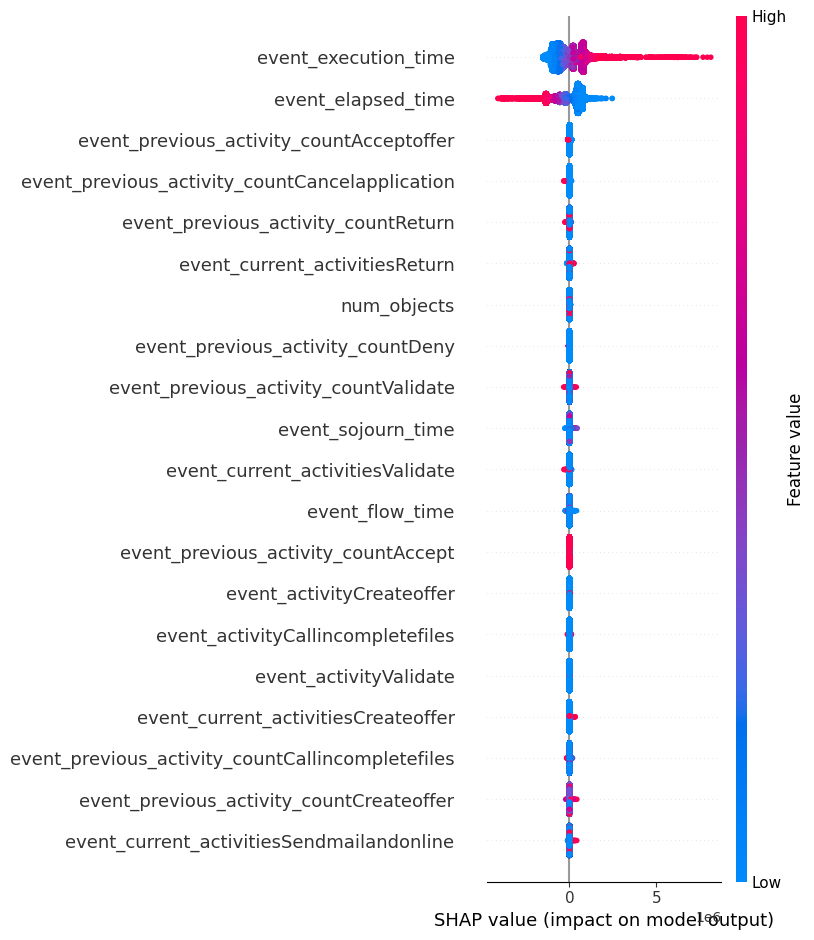

In [10]:
shap.summary_plot(shap_values, X_valid)